In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import stats
import warnings
import random

#suppress warnings
warnings.filterwarnings('ignore')

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (12,7.5)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

## Lab 6
### Confidence intervals
For this week we will be using the real data you are working on, but more as a background for the main activity rather than in depth explorations. Don't worry, more in-depth exploration the next two weeks!

### Setup
First, we want to have some 'background' data (presumably signal free) onto which we can inject a simulated signal. So the first step is to isolate some appropriate data from your data files. 
#### LHC
For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

Text(0.5, 1.0, 'Poisson Background with mu=100')

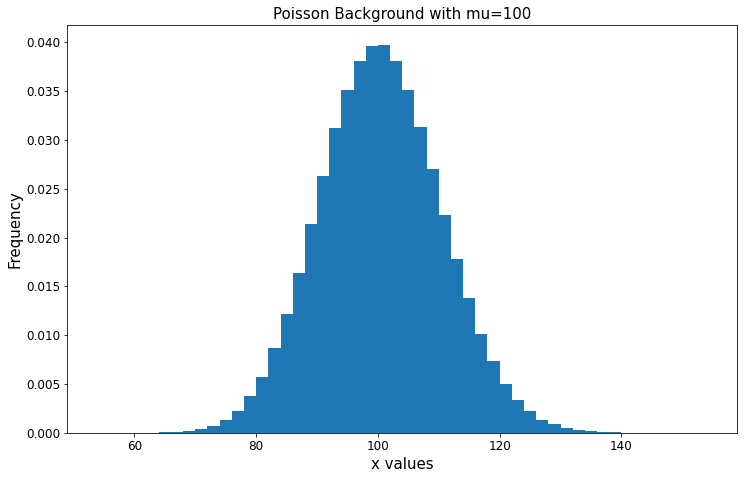

In [3]:
bkgd = stats.poisson.rvs(mu=100, size=int(1e6))
plt.hist(bkgd, bins=50, density=True)
plt.xlabel('x values', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Poisson Background with mu=100', fontsize=15)

### Problem 1
The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]

5 sigma threshold: 154.0


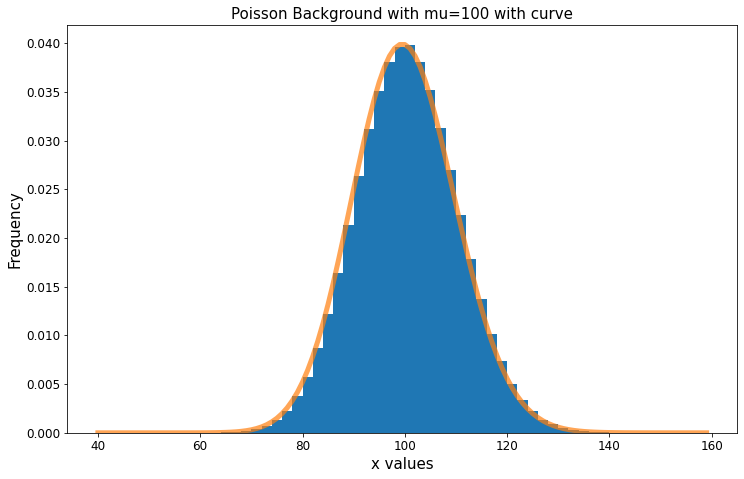

In [22]:
plt.hist(bkgd, bins=50, density=True)
plt.xlabel('x values', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Poisson Background with mu=100 with curve', fontsize=15)
x = np.arange(40, 160)
plt.plot(x, stats.poisson.pmf(x, mu=100), linewidth = 5, alpha = 0.7)

# find 5 sigma threshold
print('5 sigma threshold: ' + str(stats.poisson.ppf(stats.norm.cdf(5), mu=100)))

### Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

In [23]:
print('Probability for 8 sigma: ' + str(1-stats.norm.cdf(8)))
print('Value Threshold for 8 sigma: ' + str(stats.poisson.ppf(stats.norm.cdf(8), mu=100)))
signal = np.zeros(int(1e6))
# 200 > 190 where 190 is the 8 sigma threshold
# set 10,000 values to 200
signal[0:10000] = 200
data = bkgd + signal

Probability for 8 sigma: 6.661338147750939e-16
Value Threshold for 8 sigma: 190.0


#### a) 
Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

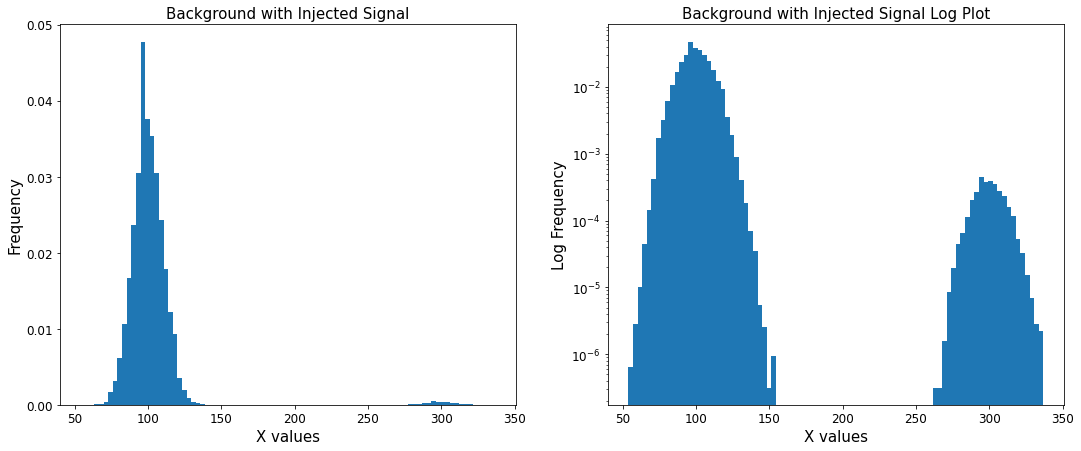

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))
ax[0].hist(data, bins=90, density=True)
ax[0].set_title('Background with Injected Signal', fontsize=15)
ax[0].set_xlabel('X values', fontsize=15)
ax[0].set_ylabel('Frequency', fontsize=15)

ax[1].hist(data, bins=90, density=True)
ax[1].set_title('Background with Injected Signal Log Plot', fontsize=15)
ax[1].set_xlabel('X values', fontsize=15)
ax[1].set_ylabel('Log Frequency', fontsize=15)
ax[1].set_yscale('log')

The observed signal appears as a Poisson distribution with a mean approximately 200 (the chosen injected signal) higher than the distribution of the rest of the background. This histogram means that despite injected the same signal over and over again (the signal 200, 10,000 times) the innate shape of the background causes the observed signal to have a Poisson distribution.

#### b) 
Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

Mean of observed signal: 300.0241
Std Dev of observed signal: 9.904701872848067


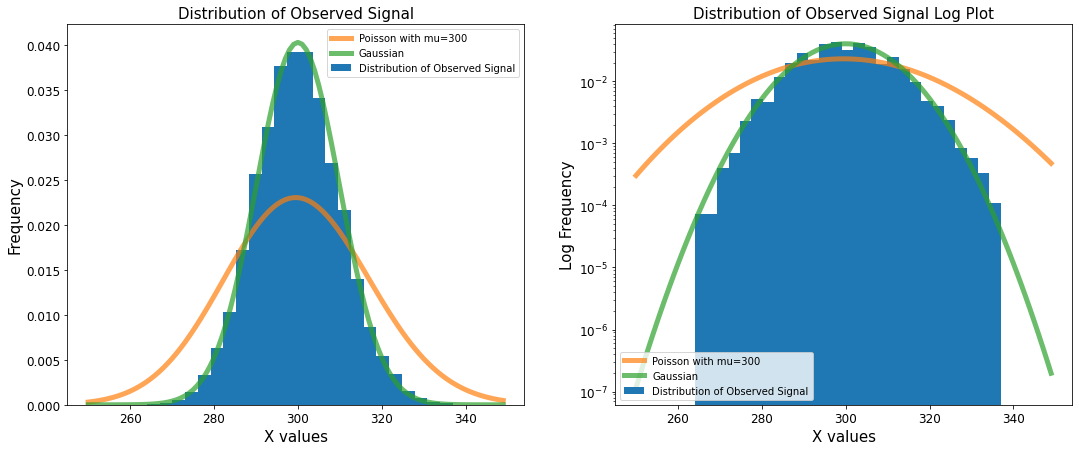

In [29]:
signal_only = data[data > 200]
print('Mean of observed signal: ' + str(np.mean(signal_only)))
print('Std Dev of observed signal: ' + str(np.std(signal_only)))
fig, ax = plt.subplots(1, 2, figsize=(18,7))

x = np.arange(250, 350)
ax[0].hist(signal_only, bins=24, density=True, label='Distribution of Observed Signal')
ax[0].plot(x, stats.poisson.pmf(x, mu=300), linewidth=5, alpha=0.7, label='Poisson with mu=300')
ax[0].plot(x, stats.norm.pdf(x, loc=np.mean(signal_only), scale=np.std(signal_only)), linewidth=5, alpha=0.7, label='Gaussian')
ax[0].set_title('Distribution of Observed Signal', fontsize=15)
ax[0].set_xlabel('X values', fontsize=15)
ax[0].set_ylabel('Frequency', fontsize=15)
ax[0].legend()

ax[1].hist(signal_only, bins=27, density=True, label='Distribution of Observed Signal')
ax[1].plot(x, stats.poisson.pmf(x, mu=300), linewidth=5, alpha=0.7, label='Poisson with mu=300')
ax[1].plot(x, stats.norm.pdf(x, loc=np.mean(signal_only), scale=np.std(signal_only)), linewidth=5, alpha=0.7, label='Gaussian')
ax[1].set_title('Distribution of Observed Signal Log Plot', fontsize=15)
ax[1].set_xlabel('X values', fontsize=15)
ax[1].set_ylabel('Log Frequency', fontsize=15)
ax[1].legend()
ax[1].set_yscale('log')

The observed signal is pretty close to being unbiased and symmetric. While the distribution of the observed signal doesn't really fit the poisson distribution with mu=300, the distribution of the observed signal does come pretty close to the symmetric Gaussian distribution with mean of approximately 300, and standard deviation of approximately 10.

### Problem 3
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

In [8]:
print(str(stats.poisson.cdf(500, mu=100)))

1.0


#### a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

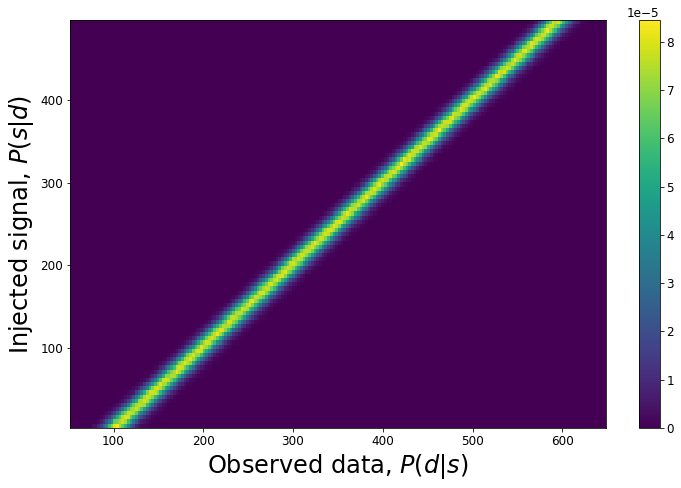

In [31]:
signal = stats.uniform.rvs(loc=0, scale=500, size=int(1e6))
data = bkgd + signal

signaledges = np.linspace(0,500,100)
dataedges = np.linspace(50,650,200)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('Injected signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.colorbar()

I am simulating a data set with a uniform distribution of signal from 0 to a values with signal strength far above 5 sigma, with a background that is a Poisson distribution with mu=100.

#### b) For the same injected signal power as in problem 2, show that you get the same answer.

Text(0.5, 0, 'Observed Signal')

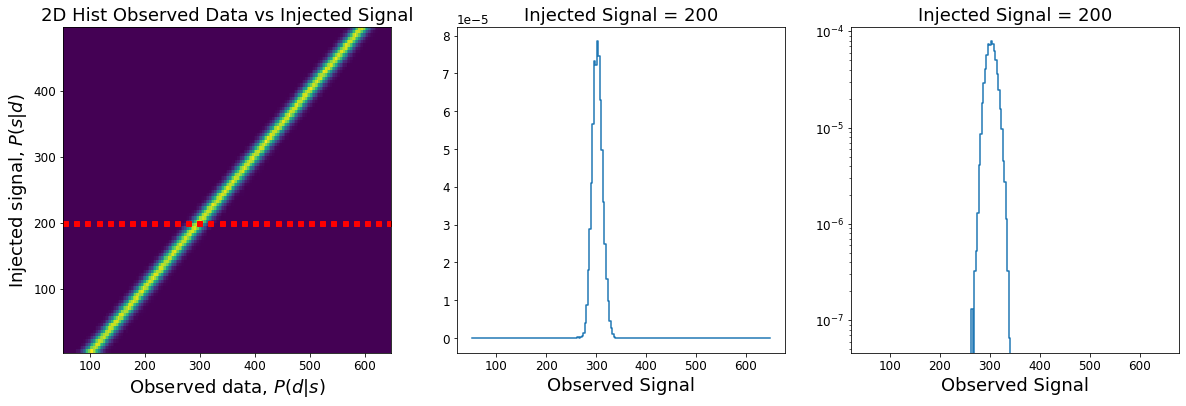

In [39]:
chosen_value = 200
index = int(chosen_value/500*100)
p_sig_200 = Psd[:, index]

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# plot 2D hist
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].set_ylabel('Injected signal, $P(s|d)$', fontsize = 18)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 18)
ax[0].set_title('2D Hist Observed Data vs Injected Signal', fontsize = 18)

# plot red dotted line
x = np.linspace(55, 645, 30)
y = [200] * 30
ax[0].plot(x, y, 'rs', markersize=5)

# plot using datacenters
dc_sig_200 = datacenters
ax[1].step(dc_sig_200, p_sig_200)
ax[1].set_title('Injected Signal = 200', fontsize=18)
ax[1].set_xlabel('Observed Signal', fontsize=18)

# plot using datacenters
ax[2].step(dc_sig_200, p_sig_200)
ax[2].set_yscale('log')
ax[2].set_title('Injected Signal = 200', fontsize=18)
ax[2].set_xlabel('Observed Signal', fontsize=18)